In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split
import numpy as np
import os
%matplotlib inline

In [4]:
data = pd.read_csv("car_evaluation.csv")
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
data.columns = ["buying","maint","doors","persons","lug_boot","safety","value"]
data.head()

,buying,maint,doors,persons,lug_boot,safety,value
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


### Target
buying: unacc, acc, good, vgood.

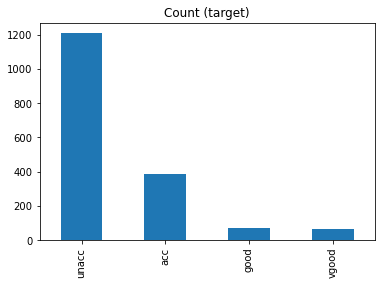

In [6]:
data.value.value_counts().plot(kind='bar', title='Count (target)');

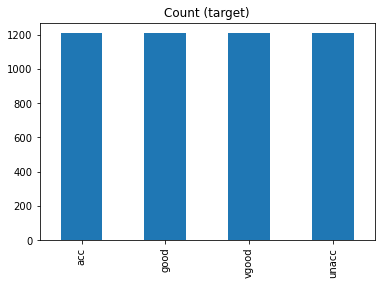

In [7]:
# Class count
class_count = data.value.value_counts()
# for oversampling getting the max count
max_class = max(class_count)

# Divide DataFrame by class
df_class_0 = data[data['value'] == "acc"]
df_class_1 = data[data['value'] == "good"]
df_class_2 = data[data['value'] == "unacc"]
df_class_3 = data[data['value'] == "vgood"]
#Oversampling
df_class_0_over = df_class_0.sample(max_class,replace = True)
df_class_1_over = df_class_1.sample(max_class,replace = True)
# df_class_2_over = df_class_2.sample(max_class) # not using maximum class
df_class_3_over = df_class_3.sample(max_class,replace = True)

data_os = pd.concat([df_class_0_over,df_class_1_over,df_class_3_over,df_class_2], axis = 0)
data_os.value.value_counts().plot(kind='bar', title='Count (target)');

In [8]:
# data cleansing
data_os.doors = data_os.doors.replace({"5more": 5}) 
# data_os.doors = data_os.doors.replace({"3":2,"5":4,"2":2,"4":4,5:4})
data_os.persons = data_os.persons.replace({"more": 5})
data_os.head()

,buying,maint,doors,persons,lug_boot,safety,value
1500,low,high,5,4,big,med,acc
633,high,high,5,4,med,med,acc
322,vhigh,med,5,5,big,high,acc
1348,low,vhigh,3,5,big,high,acc
322,vhigh,med,5,5,big,high,acc


In [9]:
map1 = {"low" : 1, "med":2,"high":3, "vhigh": 4}
map2 = {"small" : 1, "med":2,"big":3}
data_os["buying"] = data_os["buying"].map(map1)
data_os["maint"] = data_os["maint"].map(map1)
data_os["safety"] = data_os["safety"].map(map1)
data_os["lug_boot"] = data_os["lug_boot"].map(map2)
data_os.head()

,buying,maint,doors,persons,lug_boot,safety,value
1500,1,3,5,4,3,2,acc
633,3,3,5,4,2,2,acc
322,4,2,5,5,3,3,acc
1348,1,4,3,5,3,3,acc
322,4,2,5,5,3,3,acc


In [14]:
data_os["doors"]  = pd.to_numeric(data_os["doors"])
data_os["persons"] = pd.to_numeric(data_os["persons"])

In [15]:
data_os["car_type"] = data_os["doors"]+data_os["persons"] # created feature
type_dict = {4:"Coupe",
             5:"Coupe",
            6:"GT",
            7:"Sedan",
            8:"Hatchback",
            9:"SUV",
            10:"SUV"}
# data_os["car_type"] = data_os["car_type"].map(type_dict)

# set(data_os["car_type"].values.tolist())
data_os["car_type"] = data_os["car_type"].astype('category')

In [16]:
target = ['value']
reject = target
features = [x for x in data_os.columns if x not in reject]
x = data_os[features]
y = data_os[target]

In [17]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.25, random_state = 0)
print(xTrain.shape)
print(xTest.shape)

(3627, 7)
(1209, 7)


In [18]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_jobs=-1,random_state=51)

model.fit(xTrain,yTrain)
print(model.score(xTest,yTest))
print(sklearn.metrics.f1_score(yTest,model.predict(xTest),average='macro'))

C:\Users\Dell\AppData\Local\Temp\ipykernel_3208\1901713868.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xTrain,yTrain)


0.9983457402812241
0.9983214671953857
